# Python Assignment 2

⏱⏱⏱**Due: 10/15/2023 11:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Collaboration is permitted and encouraged; however, it's essential to independently produce and submit your own work. If you collaborate with others, please ensure that you provide their names in the designated section.

Collaborators:_____

(150 points total)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)


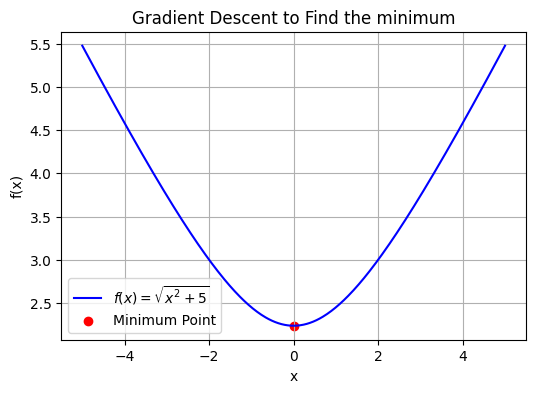

In [89]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = sqrt(x^2 + 5)
def f(x):
    return (x**2 + 5)**(1/2)    #x**2 + 4*x +4

# Plot the function f(x), np.linspace might be helpful.
x = np.linspace(-5, 5, 400)                                         # 400 points between -5 and 5
y = f(x)

x_mini = 0
y_mini = f(x_mini)


plt.figure(figsize=(6, 4))                                          # Plot the function with the minimum point in 6*4 figure
plt.plot(x, y, label='$f(x) = \sqrt{x^2+5}$', color='blue')
plt.scatter(x_mini, y_mini, label='Minimum Point', color='red')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.title('Gradient Descent to Find the minimum')
plt.grid(True)
plt.show()                                                          # Display


the value of x_T : 4.125854372198096e-10
x_k value:  [1, 0.6734013676289095, 0.44271202010823946, 0.28733850789851934, 0.18537555225481733, 0.11928031982757692, 0.07666588314025935, 0.049253170460861764, 0.03163609366362312, 0.020318753338471336, 0.013049595251471386, 0.008380909624962194, 0.00538248530416292, 0.0034567943986221635, 0.002220055514923899, 0.0014257846991609074, 0.0009156805614815688, 0.0005880767519665193, 0.00037768002430125174, 0.00024255711293565526, 0.00015577724257418053, 0.00010004468211048949, 6.42516085484887e-05, 4.1264254257478126e-05, 2.650110585030291e-05, 1.7019781985337643e-05, 1.093059966848342e-05, 7.019949445559649e-06, 4.508415980150692e-06, 2.8954360437598443e-06, 1.8595333528247018e-06, 1.1942464754898706e-06, 7.669798673163496e-07, 4.925768080054654e-07, 3.1634717171105637e-07, 2.0316736684134222e-07, 1.3047999995064205e-07, 8.379805601563335e-08, 5.3817552074306755e-08, 3.456319930298121e-08, 2.2197493197166915e-08, 1.4255876602134216e-08, 9.155539

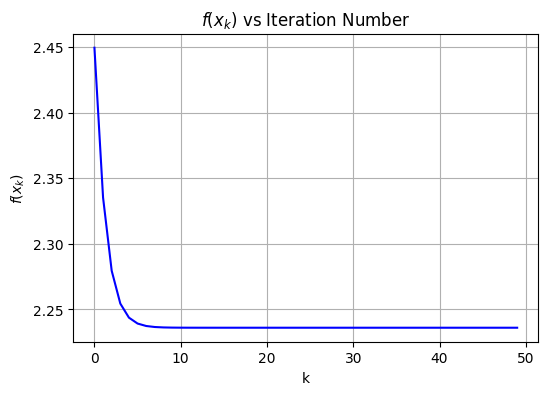

In [90]:
# Define the derivative of the function f(x), for gradient descent
def derivative_f(x):
    return x/((x**2+5)**(1/2))  #2*x +4

# write a function to run the Gradient Descent Algorithm, take input arguments x_0, step_size, and num_iterations; return a list/array of x_k values.
def gradient_descent_algo(x_value, s_s, num):
    x_list = [x_value]                                          # Store x_0 in the list
    for i in range(1, num):                                     # Loop through...
        x_value = x_value - (s_s*derivative_f(x_value))             # x_1 = x_0 - step_size * d/dx( f(x_0)) ... and so on
        x_list.append(x_value)                                      # Collect x value
    return x_list                                               # Return the list of x

# set up/assign initial values
x_0 = 1                                                         # the last digit of my SBU_ID: 0   (0/5 + 1)--> 1
step_size = 0.8                                                 # set the step size
num_iterations = 50                                             # set the number of iterations

# Run gradient descent by calling the function
x_k = gradient_descent_algo(x_0, step_size, num_iterations)     # Call the Gradient Descent Algorithm

# report x_T by printing out the value
print('the value of x_T :', x_k[-1])                            # Print the list of x, and it'll approach to 0 (x_mini)
print('x_k value: ',x_k)                                        # Print the last x value(the 50th iteration)

# Plot the f(x_k) values vs. iteration number
k = range(num_iterations)                                       # k = 1, ... ,50
f_x_k = [f(x_0)]                                                # f_x_k to hold a list of f(x_k) value
for i in range(1, num_iterations):
    f_x_k.append(f(x_k[i]))


plt.figure(figsize=(6, 4))                                      # Plot f(x_k) vs iteration number in 6*4 figure
plt.plot(k, f_x_k, color='blue')
plt.xlabel('k')
plt.ylabel('$f(x_k)$')
plt.title('$f(x_k)$ vs Iteration Number')
plt.grid(True)
plt.show()                                                      # Display



step size: 5   x_T = -1.1180339887479072
step size: 3   x_T = -8.980640473386666e-24
step size: 1   x_T = 2.704470856777848e-13
step size: 0.5   x_T = 4.407105651697012e-06


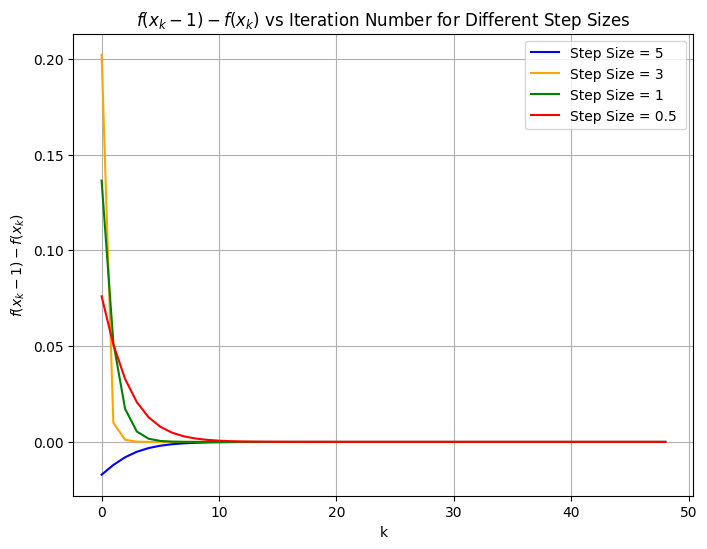

In [91]:
# create a list containing step sizes
step_size_list =[5, 3, 1, 0.5]                                              # Set a list to hold step sizes
#step_size_list =[0.99, 0.8, 0.3, 0.05]                                     # Itry to use a different list of step sizes

# initialize a list to store the results from different step sizes
results = []

# loop through the step sizes and perform GD and record results
i = j = 0
row =[]
for i in range(0, len(step_size_list)):                                     # Loop though each step size from step_size_list
    x_k = gradient_descent_algo(x_0, step_size_list[i], num_iterations)     # Call the Gradient Descent Algorithm with new step size
    
    row = [f(x_k[0]) - f(x_k[1])]                                           # Use for loop to find all difference value: f(x_k-1) - f(x_k)
    for j in range(2, num_iterations):                                          # let row to collect all values
        row.append(f(x_k[j-1]) - f(x_k[j]))
        
    results.insert(i, row)                                                  # store this row in results[i]
    print('step size:',step_size_list[i],"  x_T =",x_k[-1])                 # Print the different step size and their last x value
k1 = range(num_iterations-1)


# plot multiple curves in a single graph
plt.figure(figsize=(8, 6))                                                  # Plot 4 different figure in the same graph (size: 8*6)
plt.plot(k1, results[0], label='Step Size = 5 ', color='blue')
plt.plot(k1, results[1], label='Step Size = 3 ', color='orange')
plt.plot(k1, results[2], label='Step Size = 1 ', color='green')
plt.plot(k1, results[3], label='Step Size = 0.5 ', color='red')

#plt.plot(k1, results[0], label='Step Size = 0.99 ', color='blue')          # I/m try to use more different step size
#plt.plot(k1, results[1], label='Step Size = 0.8 ', color='orange')
#plt.plot(k1, results[2], label='Step Size = 0.3 ', color='green')
#plt.plot(k1, results[3], label='Step Size = 0.05 ', color='red')

plt.xlabel('k')
plt.ylabel('$f(x_k-1) - f(x_k)$')
plt.legend()
plt.title('$f(x_k-1) - f(x_k)$ vs Iteration Number for Different Step Sizes')
plt.grid(True) # Adding Grids
plt.show()                                                                  # Display


## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Coefficient(w1):  4.026200229130582 
Coefficient(w2):  0.5046643237056232 
Intercept(b):  4.178784089633874


<Figure size 640x480 with 0 Axes>

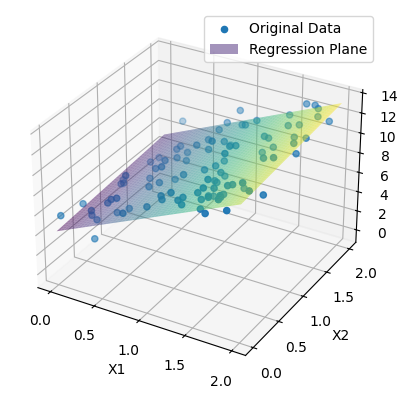

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
# Generate synthetic data
np.random.seed(80)                                                                          # change the seed to be the last two digits of my SB ID: [112496580] --> [80].
X = 2 * np.random.rand(100, 2)                                                              # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)                                  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation
X_b = np.c_[X, np.ones((100, 1))]

# Find theta using the normal equation
theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)                                     # Use normal equation to solve theta

# Print the intercept and coefficients of the regression plane
w1 = theta[0]                                                                               # Get the coefficient w1
w2 = theta[1]                                                                               # Get the coefficient w2
b = theta[2]                                                                                # Get the Intercept   b
print("Coefficient(w1): ", w1,"\nCoefficient(w2): ", w2,"\nIntercept(b): ", b)              # Print their value:


# Plot the generated data and the regression plane
x1 = np.linspace(0, 2, 100)                                                                     # Generate 100 data for x1
x2 = np.linspace(0, 2, 100)                                                                     # Generate 100 data for x2
X1, X2 = np.meshgrid(x1, x2)
y_predict = w1*X1 + w2*X2 + b                                                               # Predicted values using the regression plane

fig = plt.figure()
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.scatter(X[:, 0], X[:, 1], y ,label='Original Data')                                      # Plot the original data set
ax.set_xlabel('X1')                                                                             # show X1 axis
ax.set_ylabel('X2')                                                                             # show X2 axis
ax.set_zlabel('Y')

ax.plot_surface(X1, X2, y_predict, alpha=0.5, cmap='viridis', label='Regression Plane')     # Plot the regression plane
ax.legend()                                                                                     # Show the label
ax.set_zlim(-1.01, 14)                                                                          # Adjust the z-axis limits

plt.show()


## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [93]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):                                             # Define the sigmoid function
    return 1 / (1 + np.exp(-z))


np.random.seed(595)
X = np.random.rand(2, 100)                                          # Generate feature values for 2*100 matrix
w_true = np.array([1.5, -2.5])                                      # True weight 
b_true = 1.0                                                        # True bias
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)               # Find probabilities by using Logistic Regression       w^T*X + b --> (1*2)*(2*100) + 1
Y = (probabilities > 0.5).astype(int)                                   # convert probabilities to either 0 or 1
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

X_train, X_test = X[:,:80], X[:,80:]                                # Split the data into training data and test data
Y_train, Y_test = Y[:80], Y[80:]

w = np.zeros(X.shape[0])                                            # Initialize weight
b = 0.0                                                             # Initialize bias to 0
learning_rate = 0.78        # Choose 0.78                           # From 0.49 to 1.06 --> Training Set Accuracy is 0.90
num_epochs = 461            # Choose 461                            # From 291 to 632 --> 0.90      o.w. Training Set Accuracy start to decrese

for epoch in range(num_epochs):                                     # Training the logistic regression model
    A_train = sigmoid(np.dot(w.T, X_train) + b)                         # Vectorized form of cost function

    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)        # Partial derivative  d/dw(J)
    dJdb = np.mean(A_train - Y_train)                                   # Partial derivative  d/db(J)

    w -= learning_rate * dJdw                                           # Gradient Descent process for learning rate (w) and (b)
    b -= learning_rate * dJdb

A_train = sigmoid(np.dot(w.T, X_train) + b)                         # Make predictions on training data
predictions_train = (A_train > 0.5).astype(int)

A_test = sigmoid(np.dot(w.T, X_test) + b)                           # Make predictions on testing data
predictions_test = (A_test > 0.5).astype(int)

train_accuracy = np.mean(predictions_train == Y_train)              # Find the accuracy of the model on training data

test_accuracy = np.mean(predictions_test == Y_test)                 # Find the accuracy of the model on testing data

print(f"Training Set Accuracy: {train_accuracy:.2f}")               # Print accuracy for both training and testing data
print(f"Test Set Accuracy: {test_accuracy:.2f}")

Training Set Accuracy: 0.90
Test Set Accuracy: 0.95


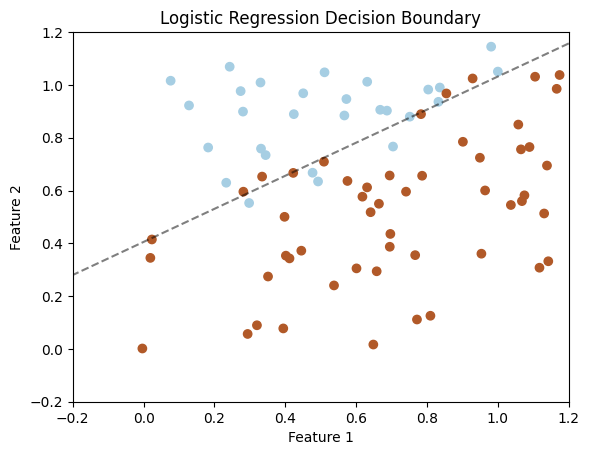

In [94]:
plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired)                              # Create a scatter for the training data points
plt.xlim(-0.2, 1.2)                                                                         # Set the limits of x-axis and y-axis
plt.ylim(-0.2, 1.2)
ax = plt.gca()

xlim = ax.get_xlim()                                                                        # Get the limits of x-axis and y-axis
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))  # the meshgrid for the decision boundary
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b                                        # Calculate the decision boundary (Just like wT*X+b)
Z = sigmoid(Z)                                                                              # Use sigmoid function to find the probabilities
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])              # Plot for the decision boundary

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()                                                                                  # Display

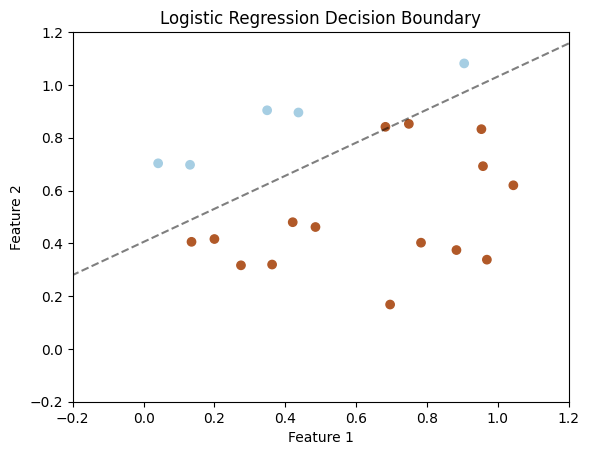

In [95]:
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)                             # Create a scatter for the testing data points ("Repeat the process for testing points")
plt.xlim(-0.2, 1.2)                                                                         # Set the limits of x-axis and y-axis
plt.ylim(-0.2, 1.2)

ax = plt.gca()
xlim = ax.get_xlim()                                                                        # Get the limits of x-axis and y-axis
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))  # the meshgrid for the decision boundary
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b                                        # Calculate the decision boundary
Z = sigmoid(Z)                                                                              # Use sigmoid function to find the probabilities
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])              # Plot for the decision boundary

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()                                                                                  # Display



## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


 Download datasets: [train](https://drive.google.com/file/d/1I1_zbX9aqvl7FaRW1qR36R4PCL7awBlH/view?usp=drive_link), [test](https://drive.google.com/file/d/1nDk_E5crLPsmLKwq8iykS8s26Xerf_X0/view?usp=drive_link)